

## **Classification Type :**



### 1).   Binary Classification

    Will customer buy life insurace (Yes/No)


### 2.   Multiclass Classification

    which party a person is going to vote for ?
    1. Democratic
    1. republican
    1. independent
    




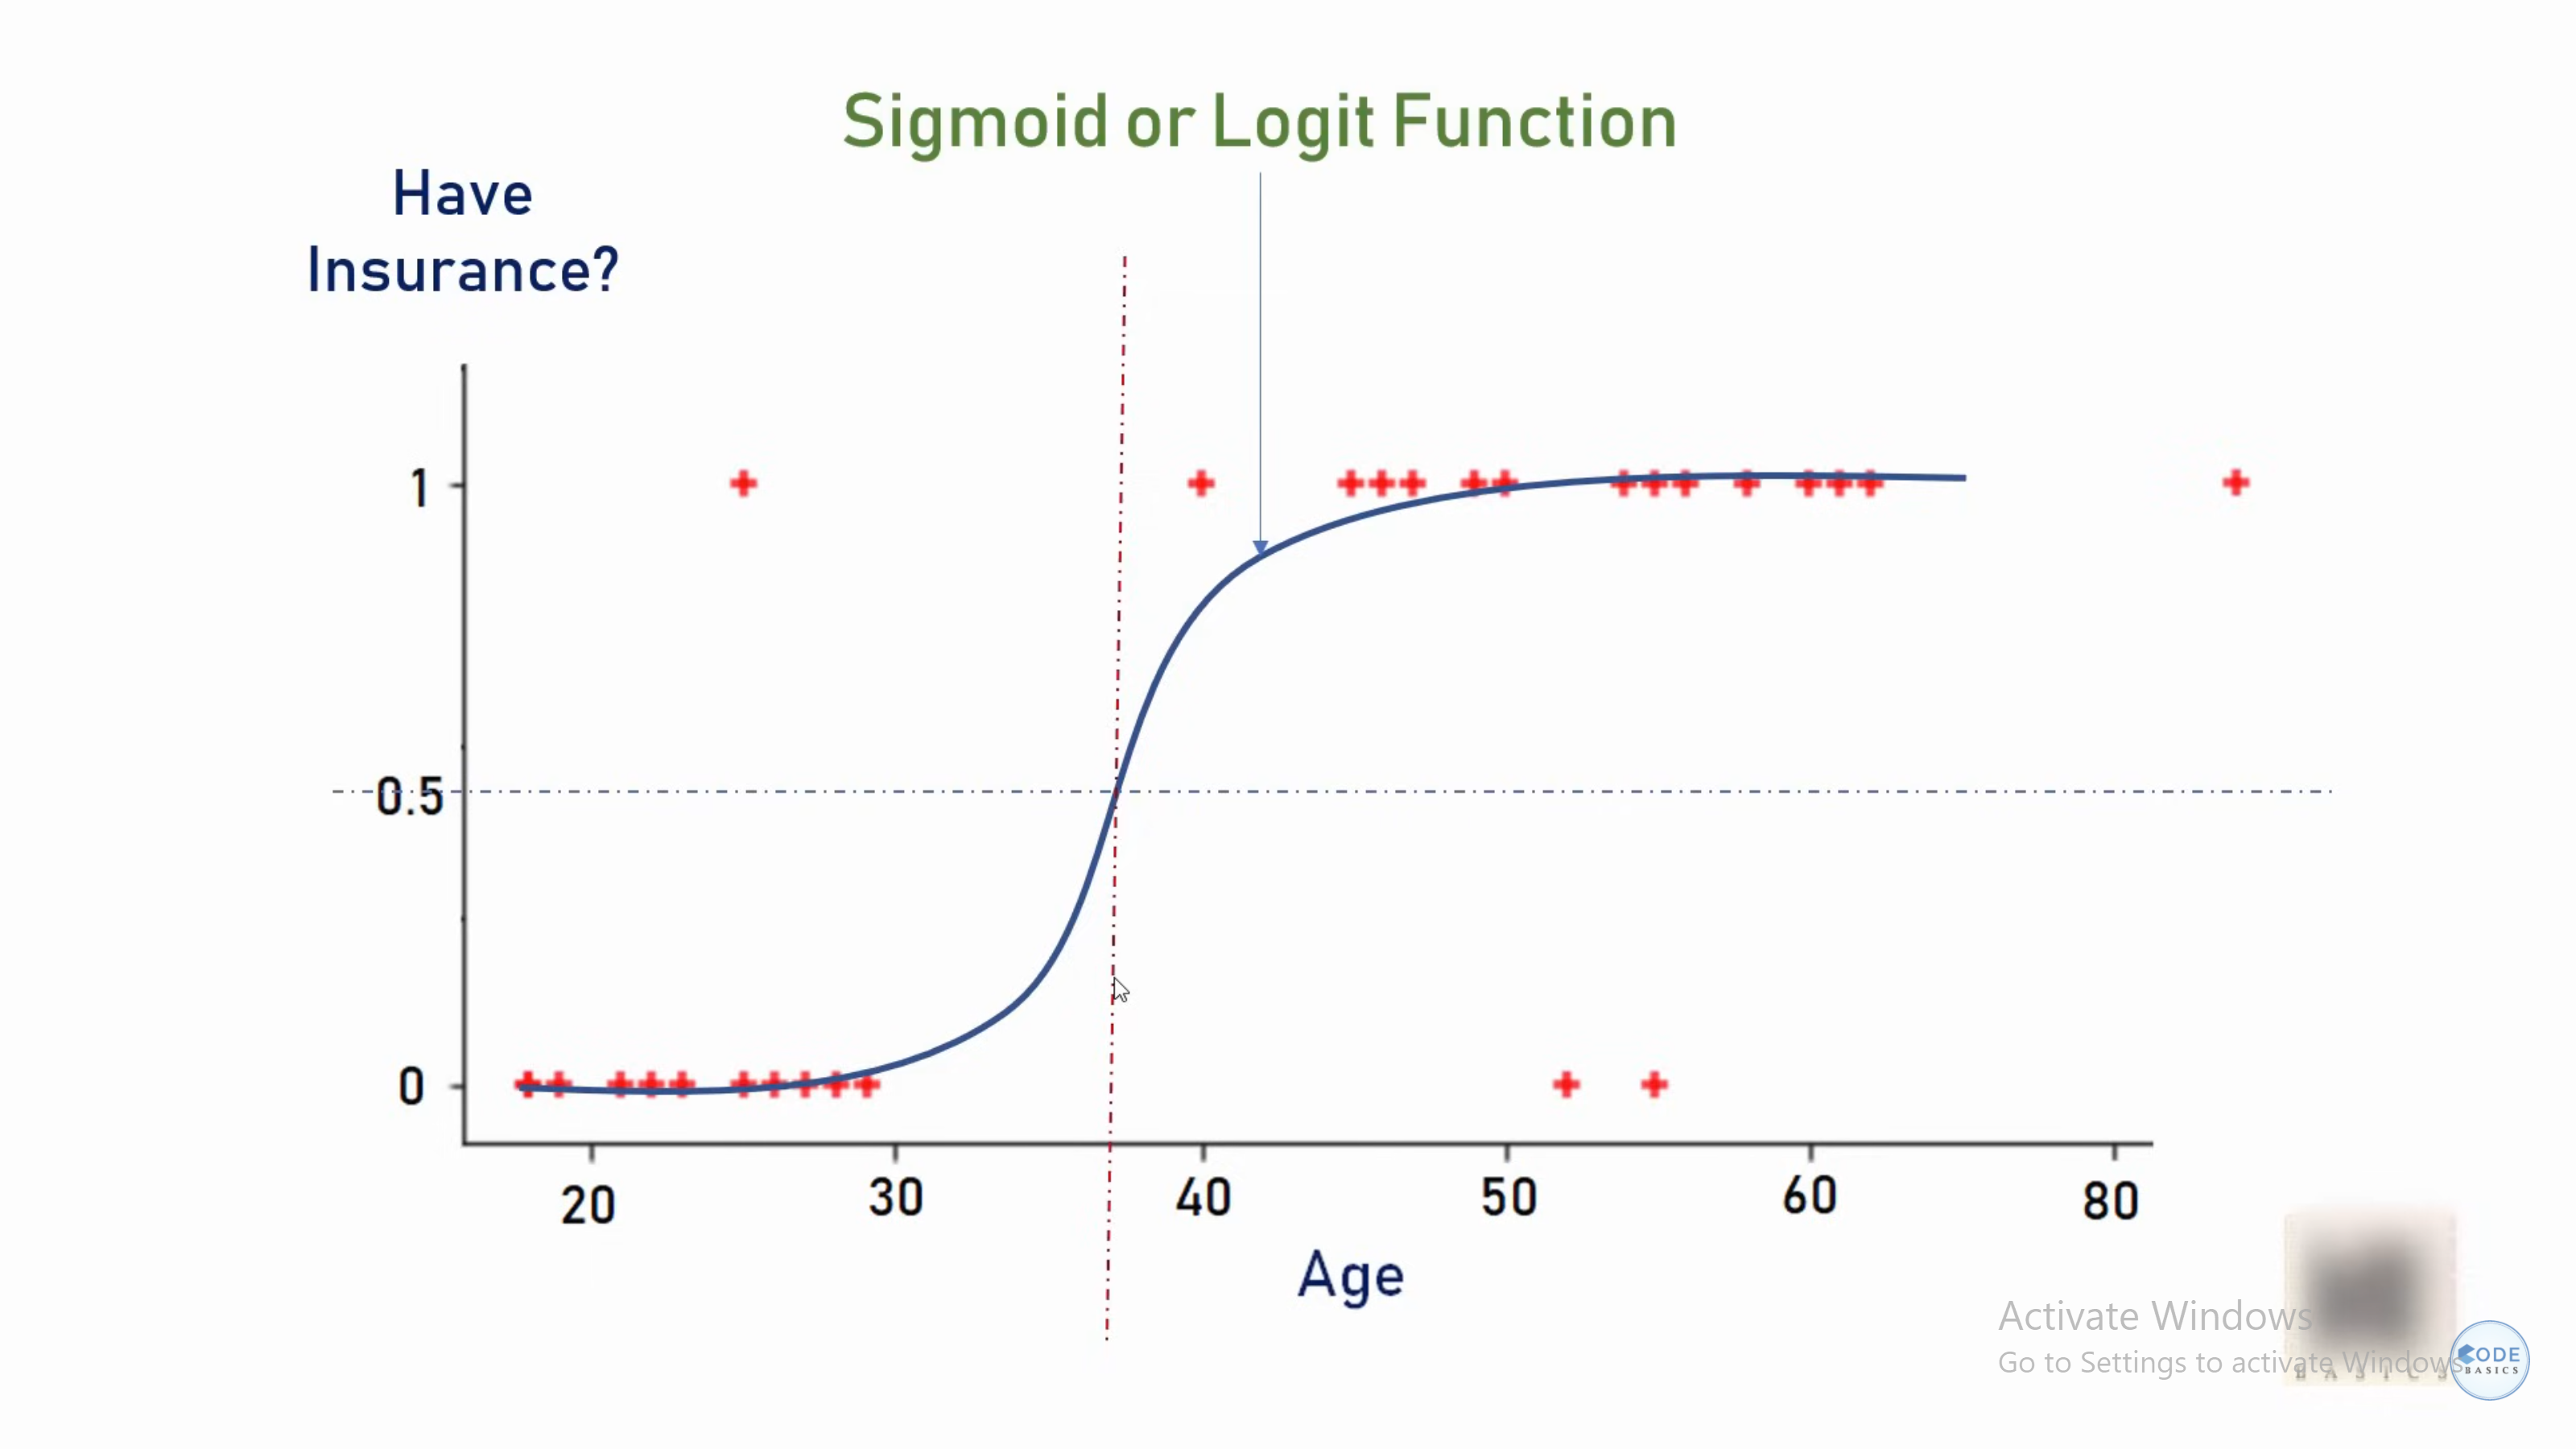

Sigmoid(z) = 1\(1+e^(-z))

> e = Euler's number ~ 2.71828


> z biasanya persamaan linear yaitu : mx + b



ketika 1 dibagi 1 lebih sedikit
maka hasilnya akan kurang dari 1

jadi, Sigmoid function coverts input into range 0 to 1



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('HR_comma_sep.csv')
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


1. Sekarang lakukan beberapa analisis data eksploratif untuk mencari tahu variabel mana yang memiliki dampak langsung dan jelas pada retensi karyawan (misalnya apakah mereka meninggalkan perusahaan atau terus bekerja)

1. Buat diagram batang yang menunjukkan dampak gaji karyawan pada retensi

1. Buat diagram batang yang menunjukkan korelasi antara departemen dan retensi karyawan

1. Sekarang buat model regresi logistik menggunakan variabel yang dipersempit pada langkah 1

1. Ukur akurasi model

# **Data Exploration & Visualization**

In [ ]:
data = data.columns

In [ ]:
left = data[data.left == 1]
left.shape

(3571, 10)

In [ ]:
retained = data[data.left == 0]
retained.shape

(11428, 10)

In [ ]:
features = np.array(data.columns[1:-2]).tolist()
features.pop(features.index('left'))
features

['last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

Rata-ratakan semua kelom

In [ ]:
data.groupby('left')[features].mean()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,
0,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


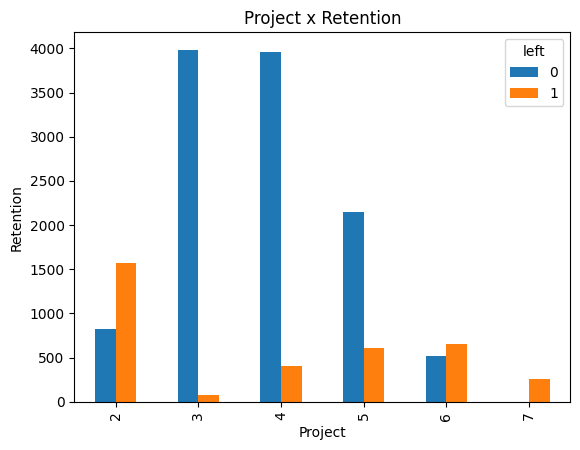

In [ ]:
pd.crosstab(data.number_project, data.left).plot(kind='bar')
plt.title('Project x Retention')
plt.xlabel('Project')
plt.ylabel('Retention')
plt.show()

Impact of salary on employee retention

Dampak gaji terhadap retensi karyawan

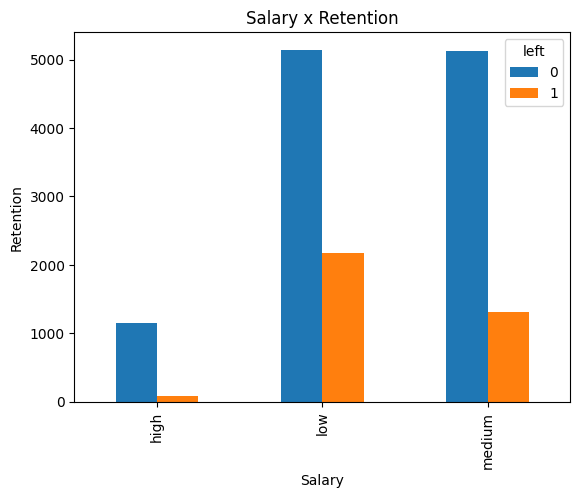

In [ ]:
pd.crosstab(data.salary, data.left).plot(kind='bar')
plt.title('Salary x Retention')
plt.xlabel('Salary')
plt.ylabel('Retention')
plt.show()



> Grafik batang di atas menunjukkan bahwa karyawan dengan gaji tinggi cenderung tidak akan meninggalkan perusahaan.



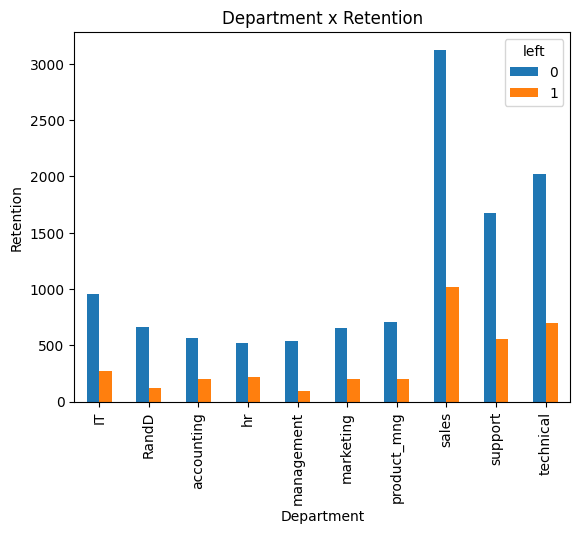

In [ ]:
pd.crosstab(data.Department, data.left).plot(kind='bar')
plt.title('Department x Retention')
plt.xlabel('Department')
plt.ylabel('Retention')
plt.show()


> Dari grafik di atas terlihat adanya pengaruh departemen terhadap retensi karyawan namun tidak terlalu besar sehingga kami akan mengabaikan departemen dalam analisis kami.



Dari analisis data sejauh ini kita dapat menyimpulkan bahwa kita akan menggunakan variabel berikut sebagai variabel independen dalam model kita

1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [ ]:
subdata = data[['satisfaction_level','number_project', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdata.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# **Get Dummies**

In [ ]:
data_dummies = pd.get_dummies(subdata['salary'])
data_with_dummies = pd.concat([subdata, data_dummies], axis='columns')
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [ ]:
data_final = data_with_dummies.drop('salary', axis='columns')
data_final

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [ ]:
X = data_final
y = data.left


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape

((12749, 6), (2250, 6))

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = model.predict(X_test)
prediction

TypeError: LinearClassifierMixin.predict() takes 2 positional arguments but 7 were given

In [ ]:
model.score(X_test, y_test)

0.7688888888888888

In [ ]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
5234,0.87,173,0,False,True,False
8157,0.42,188,0,False,False,True
2965,0.81,216,0,False,True,False
198,0.10,285,0,False,True,False
1055,0.10,292,0,False,True,False
...,...,...,...,...,...,...
6772,0.54,196,0,False,True,False
859,0.10,270,0,False,True,False
2684,0.61,174,0,False,False,True
14625,0.91,233,0,False,False,True


In [ ]:
y_test

,left
5234,0
8157,0
2965,0
198,1
1055,1
...,...
6772,0
859,1
2684,0
14625,1
